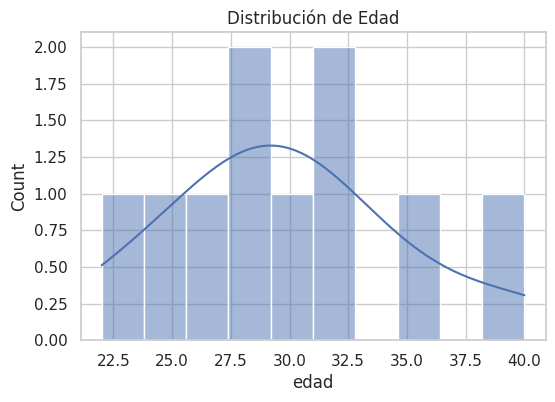

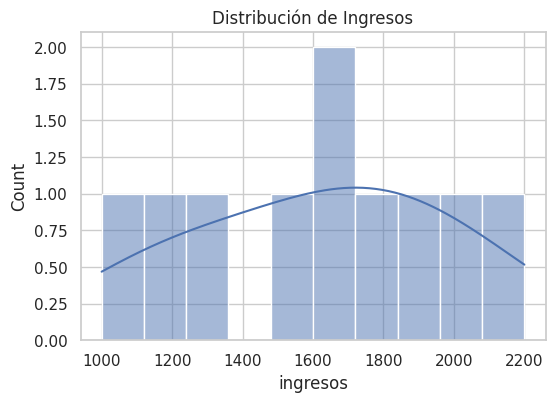

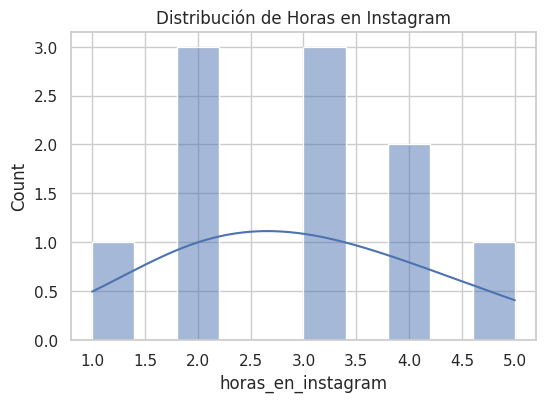

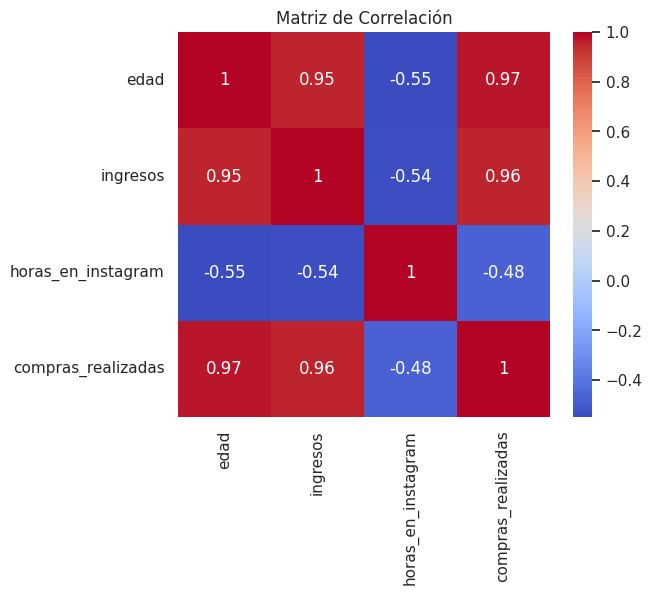

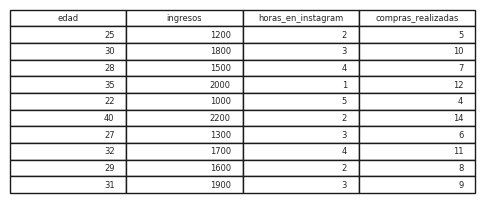

                            OLS Regression Results                            
Dep. Variable:     compras_realizadas   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     48.56
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           0.000133
Time:                        22:58:39   Log-Likelihood:                -9.1573
No. Observations:                  10   AIC:                             26.31
Df Residuals:                       6   BIC:                             27.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.9520      2

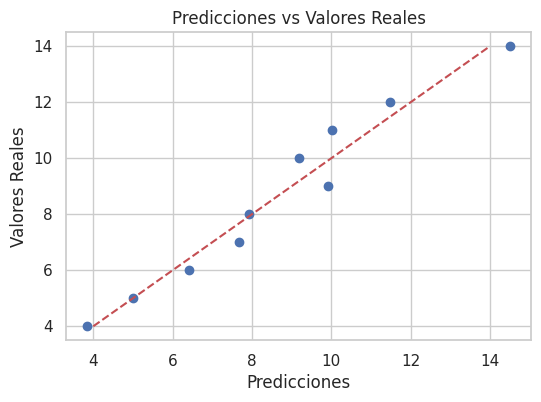

In [1]:
# ==============================================
# Notebook: Regresión Lineal Múltiple
# ==============================================

# 1️⃣ Librerías
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear carpeta para imágenes
os.makedirs("images", exist_ok=True)

# 2️⃣ Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/AncorethaX/regresion-lineal-multiple/main/data/datos.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas
data.head()

# 3️⃣ Análisis exploratorio
# Histograma de edad
plt.figure(figsize=(6,4))
sns.histplot(data['edad'], bins=10, kde=True)
plt.title("Distribución de Edad")
plt.savefig("images/edad_hist.png")
plt.show()

# Histograma de ingresos
plt.figure(figsize=(6,4))
sns.histplot(data['ingresos'], bins=10, kde=True)
plt.title("Distribución de Ingresos")
plt.savefig("images/ingresos_hist.png")
plt.show()

# Histograma de horas en Instagram
plt.figure(figsize=(6,4))
sns.histplot(data['horas_en_instagram'], bins=10, kde=True)
plt.title("Distribución de Horas en Instagram")
plt.savefig("images/horas_hist.png")
plt.show()

# 4️⃣ Matriz de correlación
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.savefig("images/correlacion.png")
plt.show()

# 5️⃣ Guardar tabla como imagen (primeras 10 filas)
df_tabla = data.head(10)
fig, ax = plt.subplots(figsize=(6,2))
ax.axis('off')
ax.table(cellText=df_tabla.values, colLabels=df_tabla.columns, loc='center')
plt.savefig("images/tabla_ejemplo.png")
plt.show()

# 6️⃣ Regresión Lineal Múltiple
# Variables independientes y dependiente
X = data[['edad', 'ingresos', 'horas_en_instagram']]
y = data['compras_realizadas']

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# 7️⃣ Predicciones vs valores reales
plt.figure(figsize=(6,4))
plt.scatter(modelo.fittedvalues, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Predicciones vs Valores Reales")
plt.savefig("images/predicciones.png")
plt.show()
